<a href="https://colab.research.google.com/github/Shivang-Quantum/QuantaPytha/blob/Tutort/Deep%20Learning/CatDogClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
cd /content/drive/MyDrive/Tutort/datasets/


/content/drive/MyDrive/Tutort/datasets


In [8]:
#unzip file

!unzip archive_Cat_Dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [10]:
training_path="/content/drive/MyDrive/Tutort/datasets/training_set/training_set"
testing_path="/content/drive/MyDrive/Tutort/datasets/test_set/test_set"

In [11]:
train_datagen=ImageDataGenerator(rescale=1/255,horizontal_flip=True)

In [12]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [13]:
train_datagen

In [14]:
training_set = train_datagen.flow_from_directory(training_path,target_size=(64,64),batch_size=32,class_mode="binary")
testing_set = test_datagen.flow_from_directory(training_path,target_size=(64,64),batch_size=32,class_mode="binary")

Found 8005 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


In [15]:
# checking the data
sample_data=next(training_set)

In [16]:
sample_data

(array([[[[0.8745099 , 0.8705883 , 0.86274517],
          [0.8745099 , 0.8705883 , 0.86274517],
          [0.8705883 , 0.86666673, 0.8588236 ],
          ...,
          [0.8470589 , 0.8431373 , 0.82745105],
          [0.854902  , 0.85098046, 0.8352942 ],
          [0.8078432 , 0.78823537, 0.77647066]],
 
         [[0.8745099 , 0.8705883 , 0.86274517],
          [0.8745099 , 0.8705883 , 0.86274517],
          [0.87843144, 0.8745099 , 0.86666673],
          ...,
          [0.8431373 , 0.83921576, 0.8235295 ],
          [0.854902  , 0.85098046, 0.8352942 ],
          [0.8078432 , 0.78823537, 0.77647066]],
 
         [[0.8745099 , 0.8705883 , 0.86274517],
          [0.8745099 , 0.8705883 , 0.86274517],
          [0.8745099 , 0.8705883 , 0.86274517],
          ...,
          [0.854902  , 0.8352942 , 0.8235295 ],
          [0.86274517, 0.8431373 , 0.8313726 ],
          [0.8078432 , 0.7843138 , 0.7843138 ]],
 
         ...,
 
         [[0.75294125, 0.6901961 , 0.6392157 ],
          [0.70196

In [17]:
sample_data[0].shape

(32, 64, 64, 3)

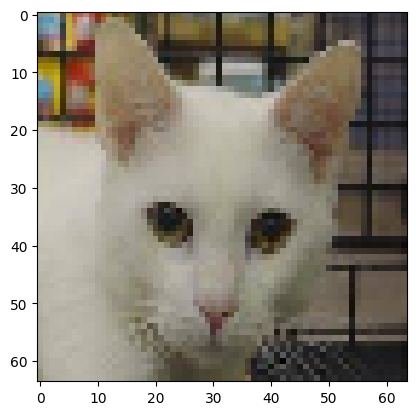

In [23]:
plt.imshow(sample_data[0][31])

In [24]:
classifier = Sequential()

In [25]:
classifier.add(Conv2D(32,(3,3)))
classifier.add(MaxPooling2D())

classifier.add(Conv2D(32,(3,3)))
classifier.add(MaxPooling2D())

classifier.add(Flatten())

classifier.add(Dense(128))

classifier.add(Dense(64))

classifier.add(Dense(1,activation="sigmoid"))

In [27]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [28]:
classifier.fit(training_set, epochs=50, validation_data=testing_set)

Epoch 1/50
251/251 [==============================] - 70s 264ms/step - loss: 0.6715 - accuracy: 0.6172 - val_loss: 0.5848 - val_accuracy: 0.6987
Epoch 2/50
251/251 [==============================] - 64s 257ms/step - loss: 0.5694 - accuracy: 0.7079 - val_loss: 0.4989 - val_accuracy: 0.7608
Epoch 3/50
251/251 [==============================] - 64s 255ms/step - loss: 0.5238 - accuracy: 0.7387 - val_loss: 0.4818 - val_accuracy: 0.7684
Epoch 4/50
251/251 [==============================] - 64s 257ms/step - loss: 0.4977 - accuracy: 0.7599 - val_loss: 0.4682 - val_accuracy: 0.7794
Epoch 5/50
251/251 [==============================] - 64s 257ms/step - loss: 0.4883 - accuracy: 0.7654 - val_loss: 0.4337 - val_accuracy: 0.8017
Epoch 6/50
251/251 [==============================] - 65s 259ms/step - loss: 0.4638 - accuracy: 0.7783 - val_loss: 0.4120 - val_accuracy: 0.8154
Epoch 7/50
251/251 [==============================] - 65s 259ms/step - loss: 0.4474 - accuracy: 0.7881 - val_loss: 0.4153 - val_ac

In [29]:
classifier.save('/content/drive/MyDrive/Tutort/Deploy/CDClassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
